# Aulas 03 e 04 - Seaborn

A biblioteca **seaborn** é baseada em **matplotlib**, e se integra, também, facilmanete a **pandas**. É muito utilizada para gerar visualizações estatísticas, principalmente durante **análises exploratórias de dados**, através de uma API de alto nível. 

Por padrão, a biblioteca já gera visualizações esteticamente bastante agradáveis.

**Leituras interessantes**

[Artigo científico da biblioteca](https://joss.theoj.org/papers/10.21105/joss.03021)

[Guia introdutório da biblioteca](https://seaborn.pydata.org/tutorial/introduction.html)

Alguns pontos para se ter em mente (destacados no próprio guia introdutório mencionado acima):

*While you can be productive using only seaborn functions, full customization of your graphics will require some knowledge of matplotlib’s concepts and API. One aspect of the learning curve for new users of seaborn will be knowing when dropping down to the matplotlib layer is necessary to achieve a particular customization. On the other hand, users coming from matplotlib will find that much of their knowledge transfers.*

A biblioteca **seaborn** distingue entre funções a nível de **axes** e de **figure**. 

**Axes-level functions:** atuam no objeto *axes* do matplotlib, gerando plots contidos **apenas nos eixos**.

**Figure-level functions:** atuam no objeto *Figure* do matplotlib, gerando plots que compreendem **toda uma figura**.

**Facet grid:**

In [62]:
import seaborn as sns
tips = sns.load_dataset("tips")

In [63]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


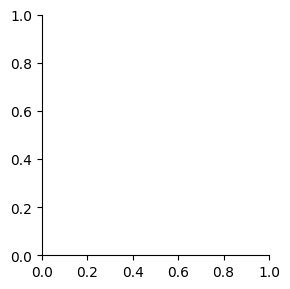

In [64]:
sns.FacetGrid(tips)

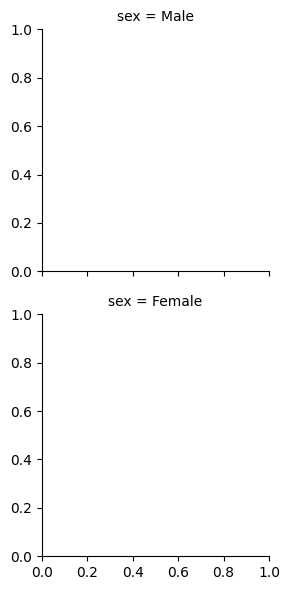

In [65]:
sns.FacetGrid(tips, row = "sex")

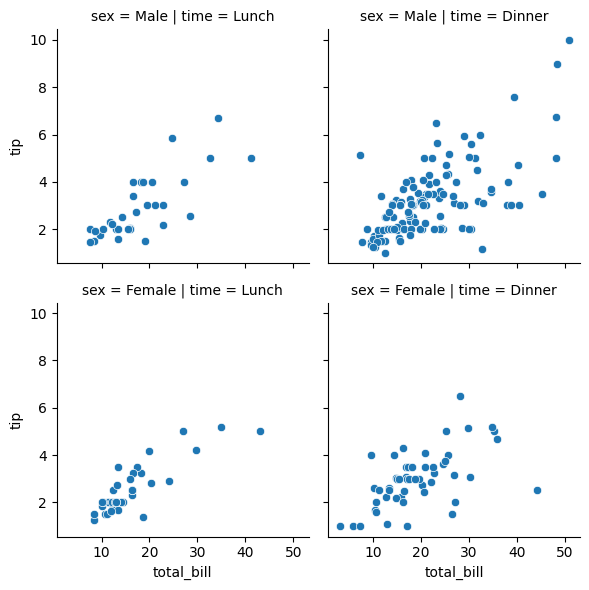

In [66]:
g = sns.FacetGrid(tips, row = "sex", col = "time")
g.map(sns.scatterplot, "total_bill", "tip")

A figura abaixo apresenta uma visão geral de alguns dos tipos de plot que conseguimos efetuar com a biblioteca **seaborn**.

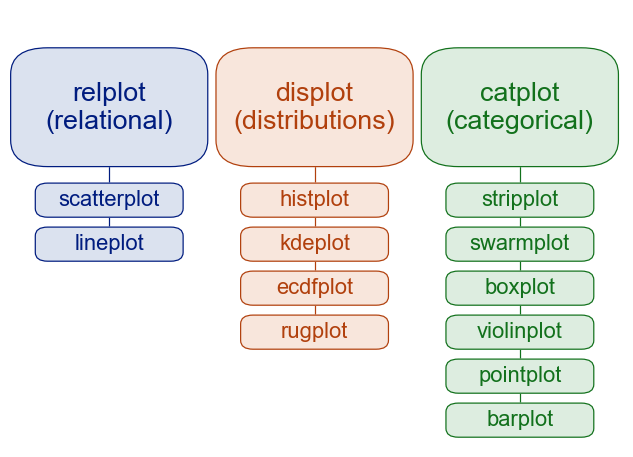

#### Alguns exemplos de plots

Ainda com o exemplo do dataset de combustíveis...

In [67]:
import pandas as pd
df = pd.read_csv('Datasets/gas_prices_brazil.tsv', sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/gas_prices_brazil.tsv'

In [ ]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


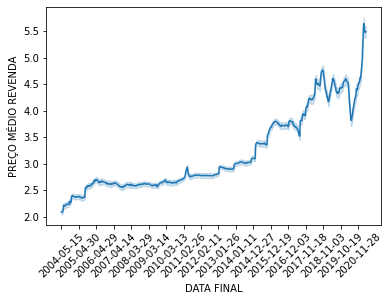

In [ ]:
# Vamos plotar o preço médio de revenda da gasolina ao longo do tempo
import matplotlib.pyplot as plt

datas = list(df['DATA FINAL'].unique())
sns.lineplot(data = df[df['PRODUTO'] == 'GASOLINA COMUM'],
            x = 'DATA FINAL',
            y = 'PREÇO MÉDIO REVENDA')

plt.xticks(datas[::50], rotation = 45);

Vamos trabalhar, agora, com um dataset de [predição de acidente vascular cerebral (AVC)](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).

In [ ]:
df = pd.read_csv("Datasets/healthcare-dataset-stroke-data.csv")

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Gráfico de barras**

<AxesSubplot: xlabel='gender', ylabel='avg_glucose_level'>

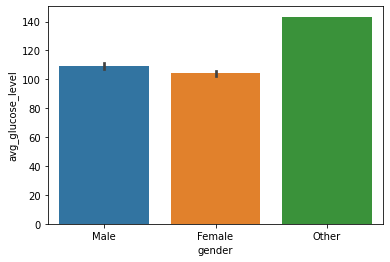

In [ ]:
sns.barplot(data = df,
           x = 'gender',
           y = 'avg_glucose_level')

<AxesSubplot: xlabel='gender', ylabel='avg_glucose_level'>

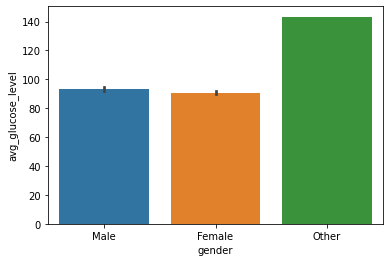

In [ ]:
import numpy as np
sns.barplot(data = df,
           x = 'gender',
           y = 'avg_glucose_level',
           estimator = np.median)

<AxesSubplot: xlabel='stroke', ylabel='avg_glucose_level'>

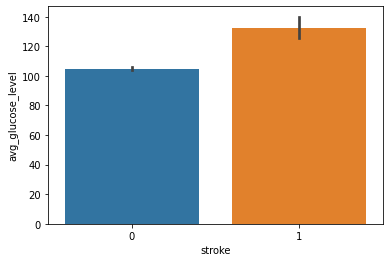

In [ ]:
sns.barplot(data = df,
            x = 'stroke',
            y = 'avg_glucose_level'
)

C:\Users\cstefano\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


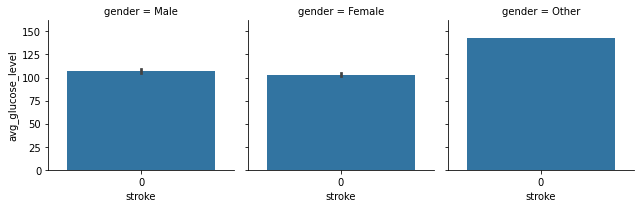

In [ ]:
g = sns.FacetGrid(df, col = "gender")
g.map(sns.barplot, "stroke", "avg_glucose_level")

**Contagem de elementos**

<AxesSubplot: xlabel='gender', ylabel='count'>

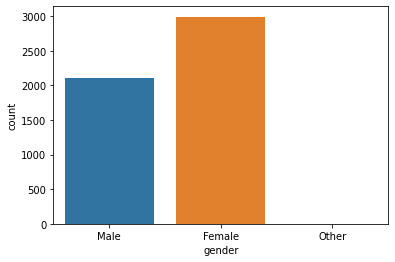

In [ ]:
sns.countplot(data = df, x = 'gender')

<AxesSubplot: xlabel='stroke', ylabel='count'>

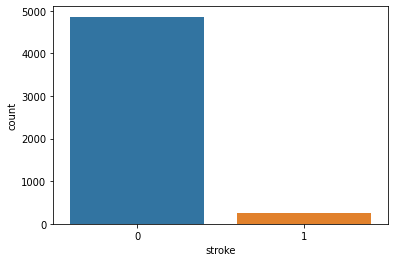

In [ ]:
sns.countplot(data = df, x = 'stroke')

In [ ]:
df.shape

(5110, 12)

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Vamos avaliar a distribuição de algumas variáveis

<AxesSubplot: xlabel='age', ylabel='Count'>

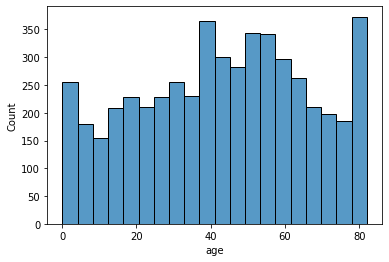

In [ ]:
sns.histplot(df, x = 'age')

<AxesSubplot: xlabel='age', ylabel='Count'>

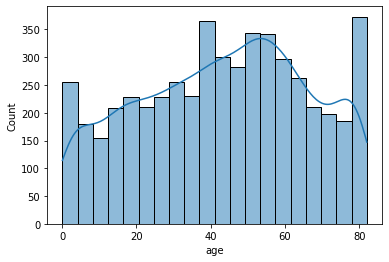

In [ ]:
sns.histplot(df, x = 'age', kde = True)

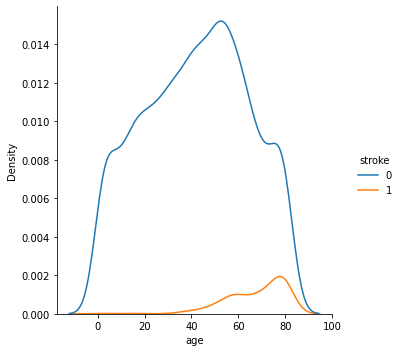

In [ ]:
sns.displot(data = df,
           x = 'age',
           hue = 'stroke',
           kind = 'kde')

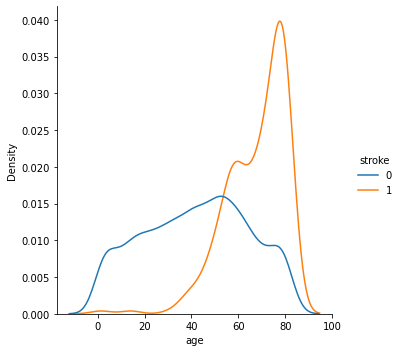

In [ ]:
sns.displot(data = df,
           x = 'age',
           hue = 'stroke',
           kind = 'kde',
           common_norm = False)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


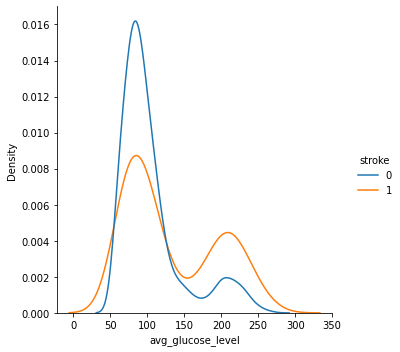

In [ ]:
sns.displot(data = df,
           x = 'avg_glucose_level',
           hue = 'stroke',
           kind = 'kde',
           common_norm = False)

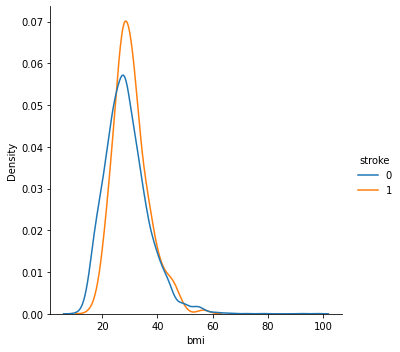

In [ ]:
sns.displot(data = df,
           x = 'bmi',
           hue = 'stroke',
           kind = 'kde',
           common_norm = False)

Como plotar em vários subplots?

C:\Users\cstefano\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


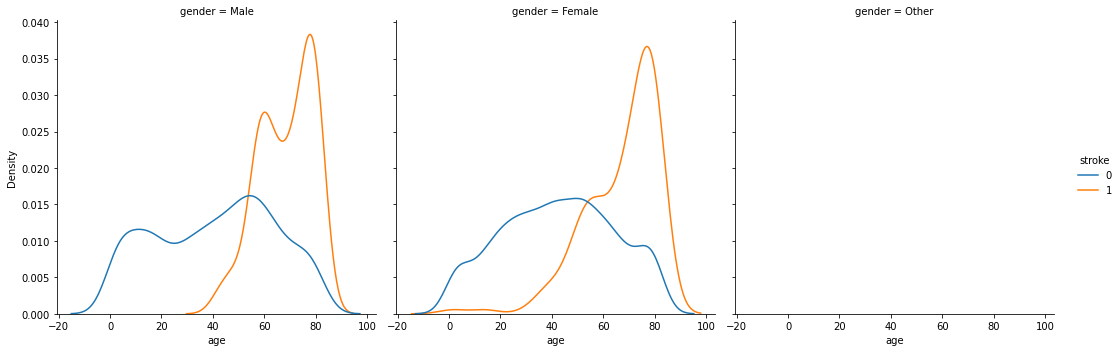

In [ ]:
sns.displot(data = df,
            x = 'age',
            hue = 'stroke',
            kind = 'kde',
            col = 'gender',
            common_norm = False
)

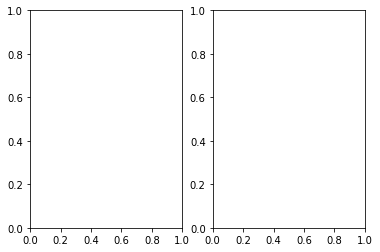

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

In [ ]:
axes

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

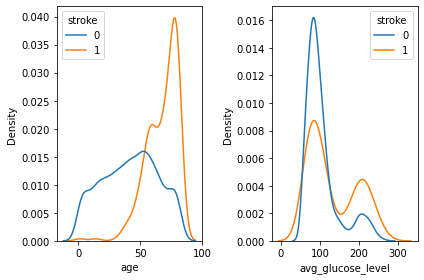

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

cols = ['age', 'avg_glucose_level']

for col, ax in zip(cols, axes):
    sns.kdeplot(data = df,
               x = col,
               hue = 'stroke',
               common_norm = False,
               ax = ax)
plt.tight_layout()

**violinplot:** plot, também, para mostrar distribuições. Combina um boxplot com o kde.

[Leitura sobre violinplot](https://mode.com/blog/violin-plot-examples/)

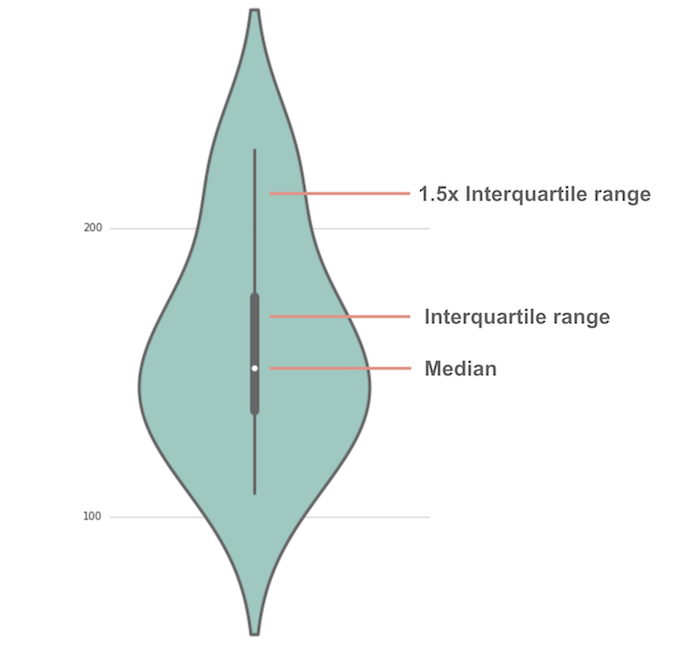  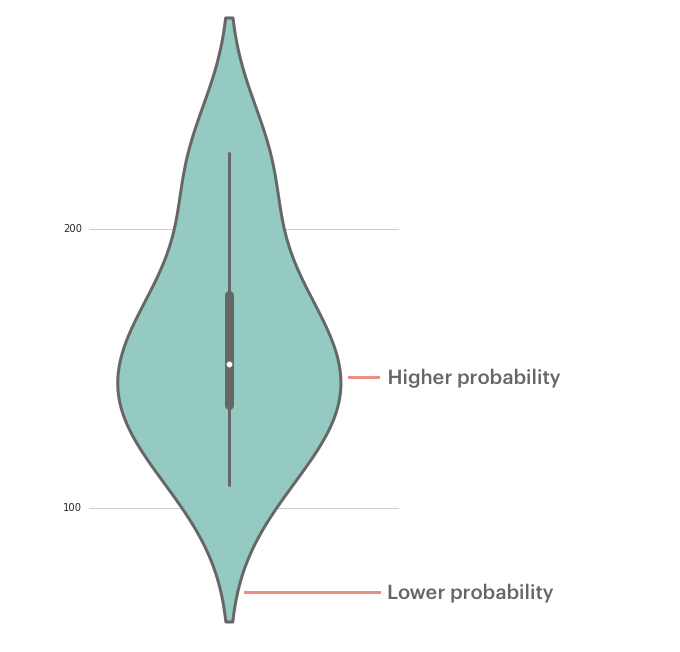

In [ ]:
import seaborn as sns

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot: xlabel='gender', ylabel='stroke'>

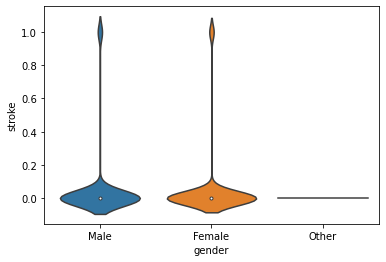

In [ ]:
sns.violinplot(data = df,
              x = 'gender',
              y = 'stroke')

<AxesSubplot: xlabel='stroke', ylabel='count'>

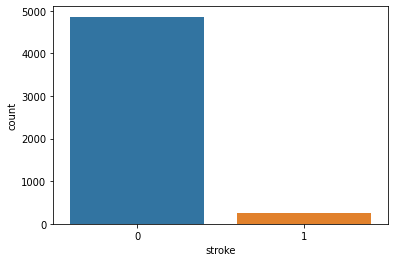

In [ ]:
sns.countplot(data = df, x = 'stroke')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot: xlabel='gender', ylabel='avg_glucose_level'>

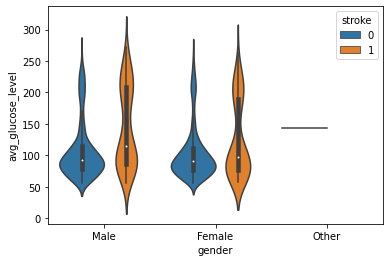

In [ ]:
sns.violinplot(data = df,
               x = 'gender',
               y = 'avg_glucose_level',
               hue = 'stroke')

**rugplot:** plota as distribuições marginais nos eixos.

<AxesSubplot: xlabel='bmi', ylabel='Density'>

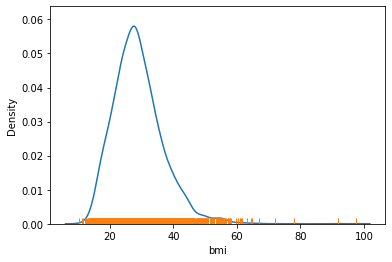

In [ ]:
sns.kdeplot(data = df, x = 'bmi')
sns.rugplot(data = df, x = 'bmi')

<AxesSubplot: xlabel='bmi', ylabel='avg_glucose_level'>

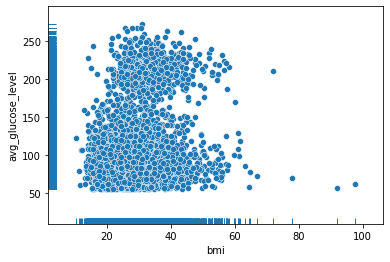

In [ ]:
sns.scatterplot(data = df,
               x = 'bmi',
               y = 'avg_glucose_level')
sns.rugplot(data = df,
           x = 'bmi',
           y = 'avg_glucose_level')

Visualizando relações entre características do dataset com **seaborn**.

A função **pairplot** sumariza as distribuições e relações entre as variáveis, par a par.

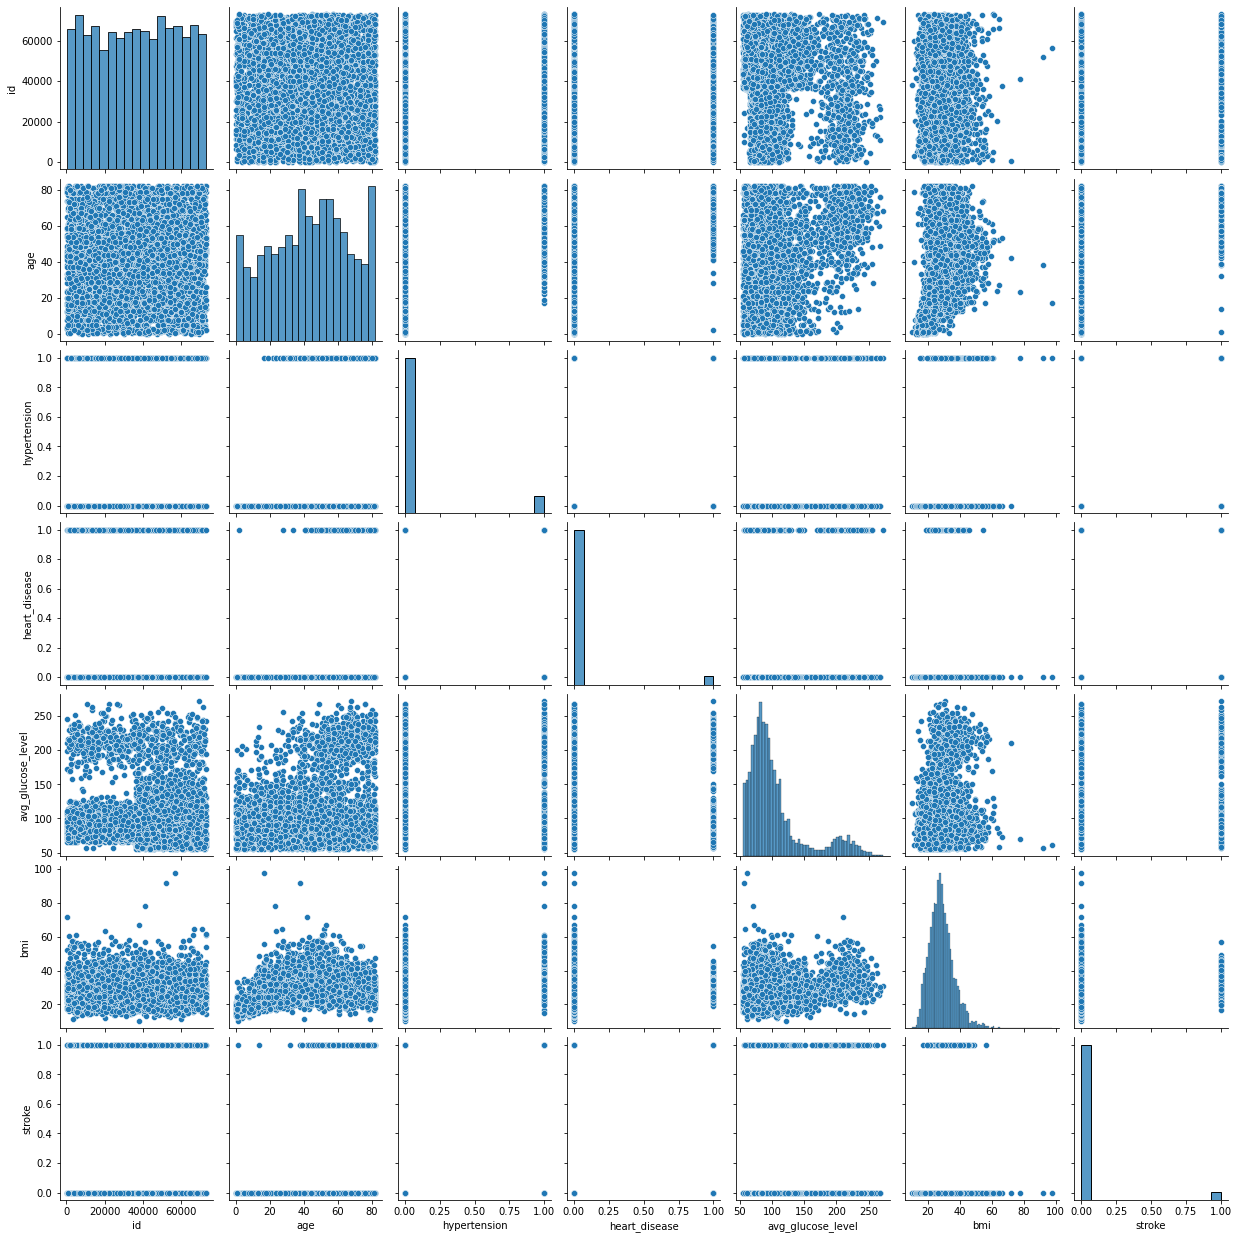

In [ ]:
sns.pairplot(df)

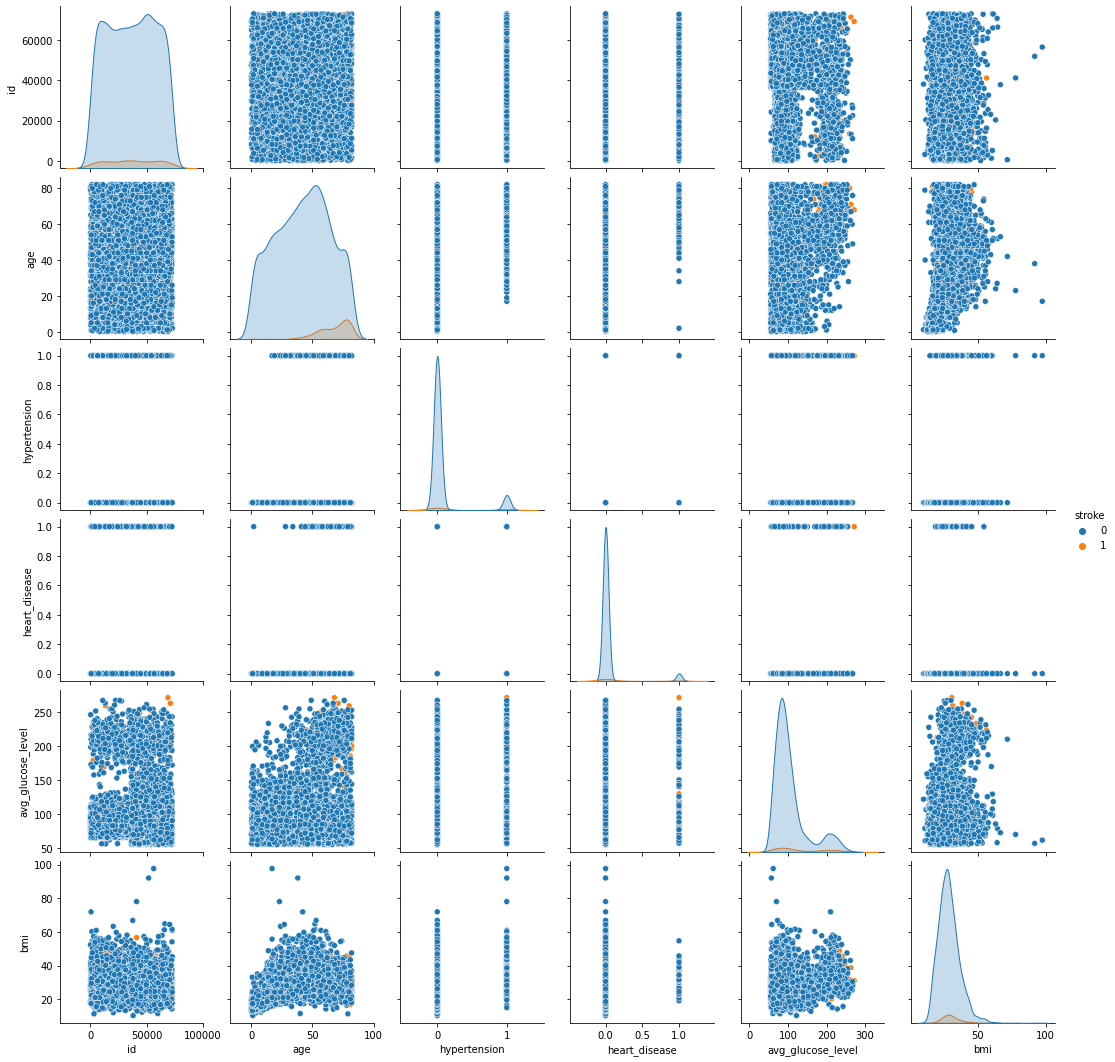

In [ ]:
sns.pairplot(df, hue = 'stroke')

Correlação entre características

**Covariância**
Medida estatística que mensura a **variabilidade conjunta** de duas variáveis aleatórias. Intuitivamente, podemos pensar na covariância como a tendência de valores superiores de uma variável estarem, também, associados a valores maiores da outra; e vice-versa.

*Definição matemática da covariância*
$cov(X,Y) = \sum_{i=1}^{n} \frac{(x_{i} - \mu_{x})(y_{i} - \mu_{y})}{n-1}$

<img src="https://dpbnri2zg3lc2.cloudfront.net/en/wp-content/uploads/2021/05/positive_negative_weak_covariance.jpg" alt="Alternative text" />

**Correlação**
Medida estatística de dependência entre duas variáveis. Pode ser vista sob alguns tipos de metodologias.

É muito comum encontrar a ideia de correlação associada à *correlação de Pearson*, que expressa a **dependência linear** entre duas variáveis a partir de suas **covariâncias**.

Cálculo da correlação de Pearson:

$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}$.

<img src="https://www.scribbr.de/wp-content/uploads/2021/08/01-correlation-types-1024x415.png" alt="Alternative text" />

A correlação de Pearson **normaliza** as covariâncias no intervalo [0,1].

Vale ressaltar que *existem outras métricas de correlação*. A correlação de Spearman, por exemplo, pode capturar relações de monotonia **não-lineares** entre duas variáveis.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Spearman_fig1.svg/1200px-Spearman_fig1.svg.png" width = 400 />

In [ ]:
# Cálculo da correlação
df.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<AxesSubplot: >

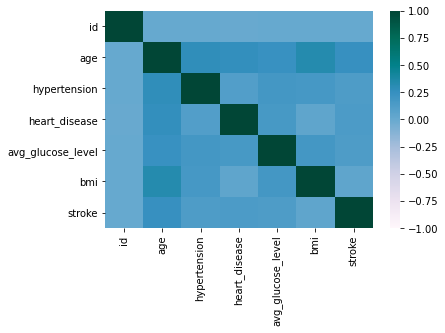

In [ ]:
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'PuBuGn')

In [ ]:
df.corr().min()

id                  -0.001296
age                  0.003538
hypertension         0.003550
heart_disease       -0.001296
avg_glucose_level    0.001092
bmi                  0.003084
stroke               0.006388
dtype: float64

## Hora de trabalhar em grupo!

Vamos fazer uma análise exploratória de dados? Utilize, para isso, a biblioteca **seaborn**, para maior familiarização com suas funções. Não se esqueça, contudo, de que você pode utilizar, inclusive, elementos de mais baixo nível da matplotlib para facilitar a customização das visualizações. Sinta-se livre para gerar as visualizações que vocês, como grupo, julgarem mais interessantes e que possam trazer alguns insights.

Desta vez, vamos passar a um dataset sobre [predição de parada cardíaca.](https://www.kaggle.com/datasets/whenamancodes/heart-failure-clinical-records)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
df['DEATH_EVENT'] = np.select([df['DEATH_EVENT'] == 1], ['Morreu'], ['Vivo'])
df['anaemia'] = np.select([df['anaemia'] == 1], ['Anemia'], ['Sem anemia'])
df['diabetes'] = np.select([df['diabetes'] == 1], ['Diabetes'], ['Sem diabetes'])
df['high_blood_pressure'] = np.select([df['high_blood_pressure'] == 1], ['Pressão alta'], ['Sem pressão alta'])
df['sex'] = np.select([df['sex'] == 1], ['Homem'], ['Mulher'])
df['smoking'] = np.select([df['smoking'] == 1], ['Fuma'], ['Não Fuma'])

df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,Sem anemia,582,Sem diabetes,20,Pressão alta,265000.00,1.9,130,Homem,Não Fuma,4,Morreu
1,55.0,Sem anemia,7861,Sem diabetes,38,Sem pressão alta,263358.03,1.1,136,Homem,Não Fuma,6,Morreu
2,65.0,Sem anemia,146,Sem diabetes,20,Sem pressão alta,162000.00,1.3,129,Homem,Fuma,7,Morreu
3,50.0,Anemia,111,Sem diabetes,20,Sem pressão alta,210000.00,1.9,137,Homem,Não Fuma,7,Morreu
4,65.0,Anemia,160,Diabetes,20,Sem pressão alta,327000.00,2.7,116,Mulher,Não Fuma,8,Morreu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,Sem anemia,61,Diabetes,38,Pressão alta,155000.00,1.1,143,Homem,Fuma,270,Vivo
295,55.0,Sem anemia,1820,Sem diabetes,38,Sem pressão alta,270000.00,1.2,139,Mulher,Não Fuma,271,Vivo
296,45.0,Sem anemia,2060,Diabetes,60,Sem pressão alta,742000.00,0.8,138,Mulher,Não Fuma,278,Vivo
297,45.0,Sem anemia,2413,Sem diabetes,38,Sem pressão alta,140000.00,1.4,140,Homem,Fuma,280,Vivo


C:\Users\limao\AppData\Local\Temp\ipykernel_8080\1260370336.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = df.corr()


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


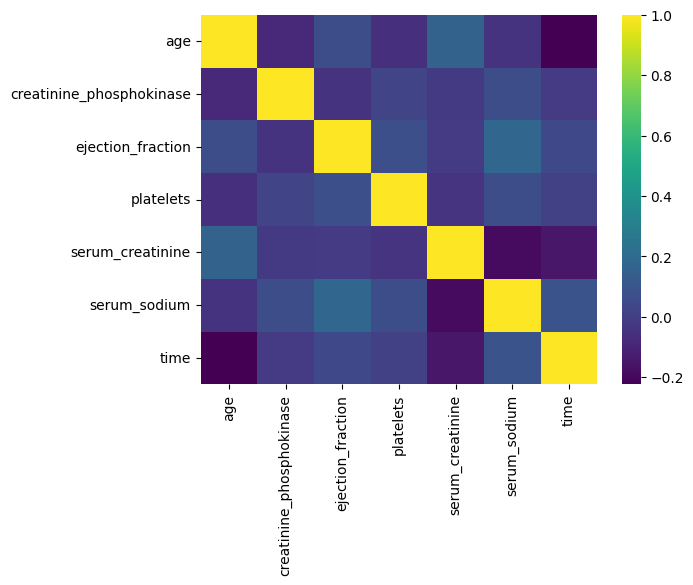

In [ ]:
matrix_corr = df.corr()

sns.heatmap(matrix_corr, cmap = 'viridis')

matrix_corr

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


C:\Users\limao\AppData\Local\Temp\ipykernel_8080\1774736355.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,subplot_counter)


ValueError: num must be an integer with 1 <= num <= 2, not 3

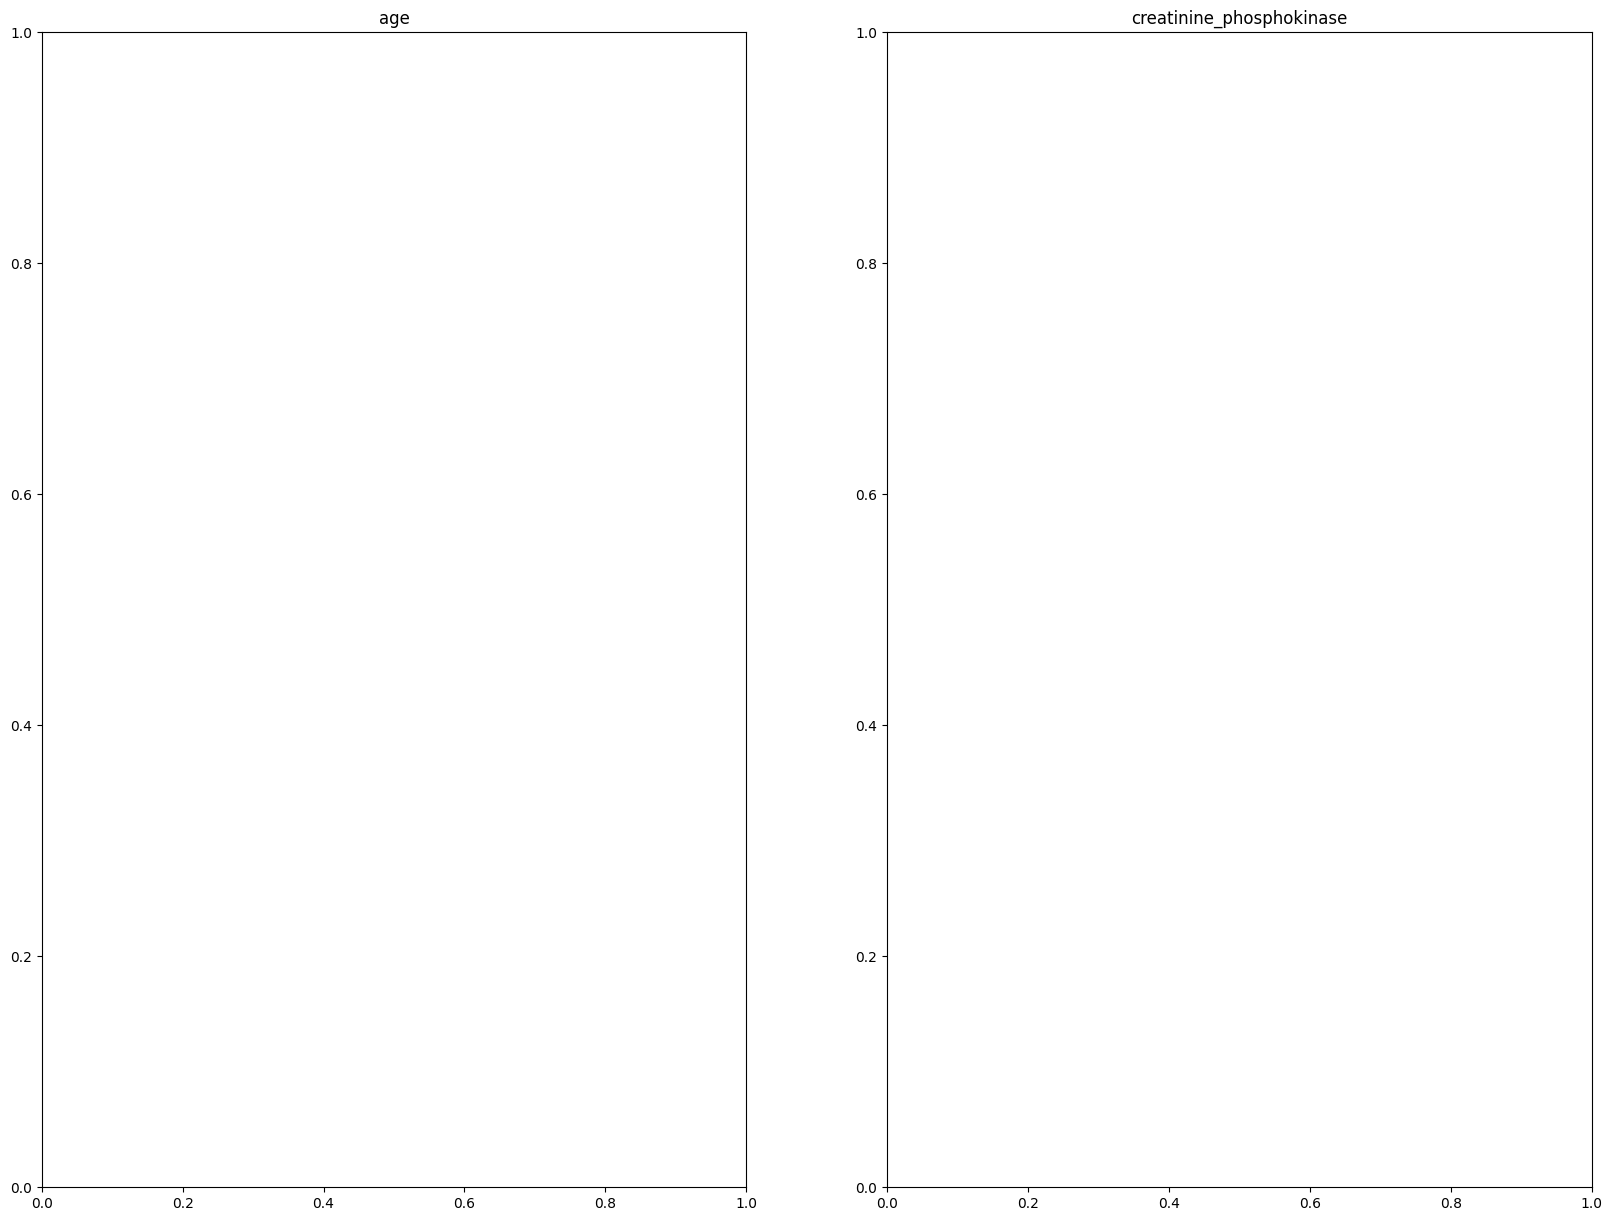

In [75]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
numerical_cols = list(df.select_dtypes(include=numerics).columns)

dict_graphs = {}

for i in numerical_cols:
    dict_graphs[i] =  sns.kdeplot(ax= ax, data=df,x=i, hue='DEATH_EVENT', fill=True, palette = ['blue','red'], common_norm = False)

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (20,15))

plt.subplot(4,2,1)

subplot_counter = 1
for k,v in dict_graphs.items():
    plt.subplot(1,2,subplot_counter)

    ax[subplot_counter-1] = v

    plt.title(k)
    subplot_counter += 1

In [70]:
numerical_cols

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

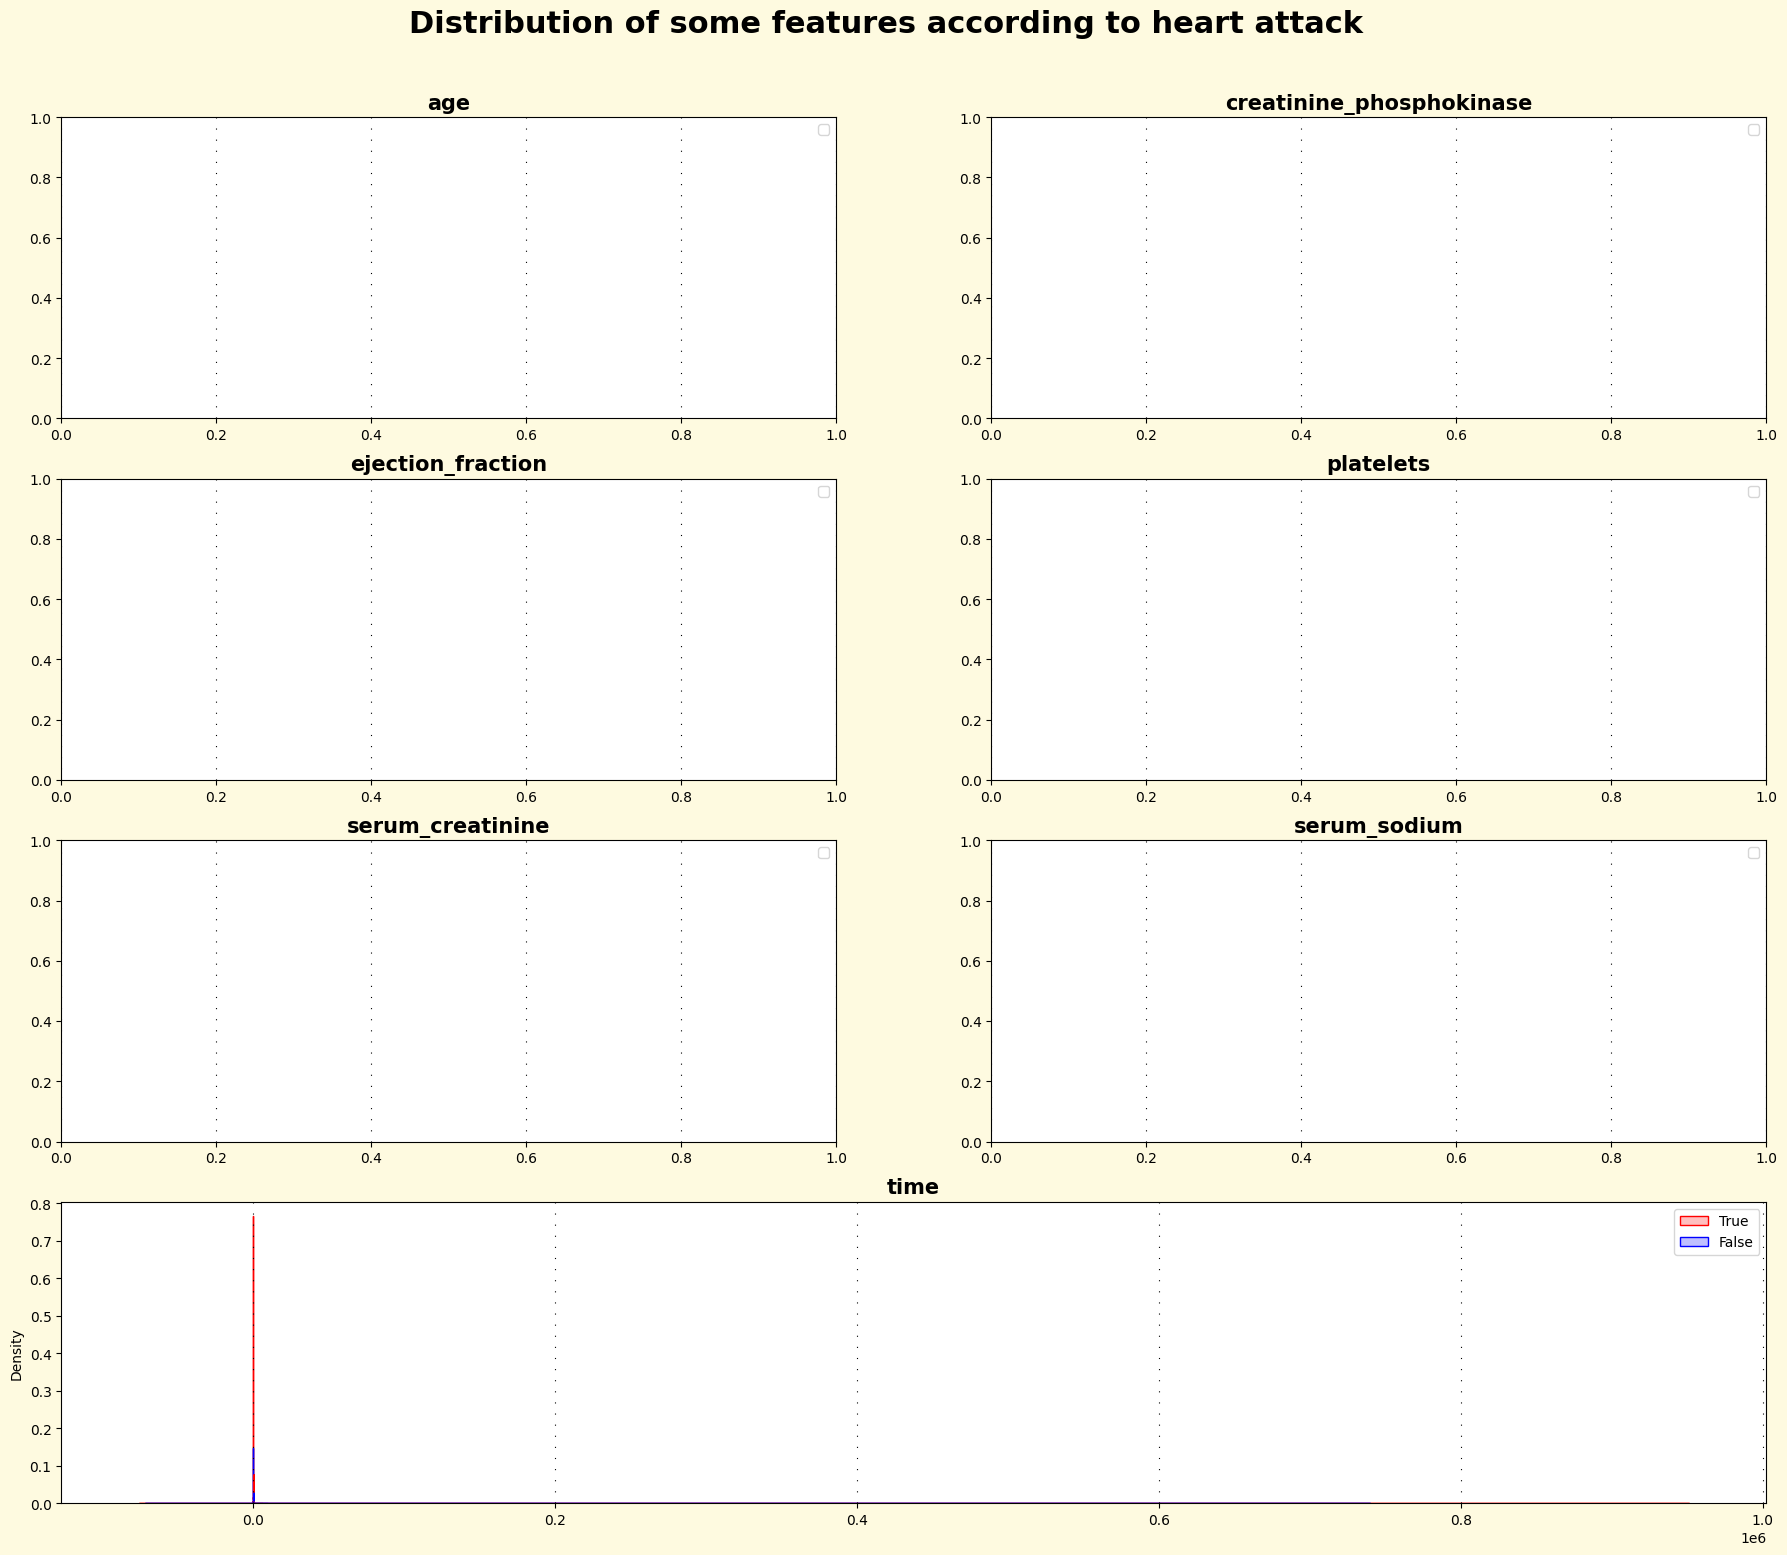

In [72]:
def plot_con_feat(df, ax, col_name, target='DEATH_EVENT'):
    ax.set_title(col_name,fontweight ="bold",fontsize=15)
    ax.grid(color='#000000', linestyle='dashed', axis='x',dashes=(1,9))
    sns.kdeplot(ax=ax,data=df,x=col_name, hue=target, fill=True, palette = ['blue','red'])
    ax.legend([True, False])
    ax.set_xlabel("")

fig = plt.figure(figsize=(22,18))
gs  = fig.add_gridspec(4,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])
ax7 = fig.add_subplot(gs[3,:])
axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7]


fig.suptitle(t='Distribution of some features according to heart attack',y=0.94, fontweight ="bold",fontsize=22)
fig.set_facecolor("#fefae0")


for ax,col_name in zip(axes,con_cols):
    plot_con_feat(df, ax, col_name)

plt.show()